<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Projeto Final
Caderno de **Aula**<br>
Pedro Vidal

---

# **Tópicos**

<ol type="1">
  <li>Exploração e análise de dados;</li>
  <li>Considerações</li>
</ol>

---

# **1. Exploração e análise de dados**





In [ ]:
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION <sua-localizacao>
TBLPROPERTIES ('has_encrypted_data'='false');

In [ ]:
select count(*) from credito

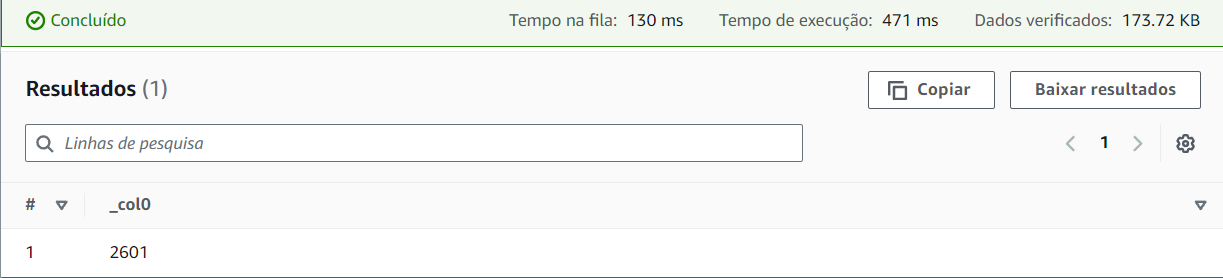

In [ ]:
select * from credito limit 10;

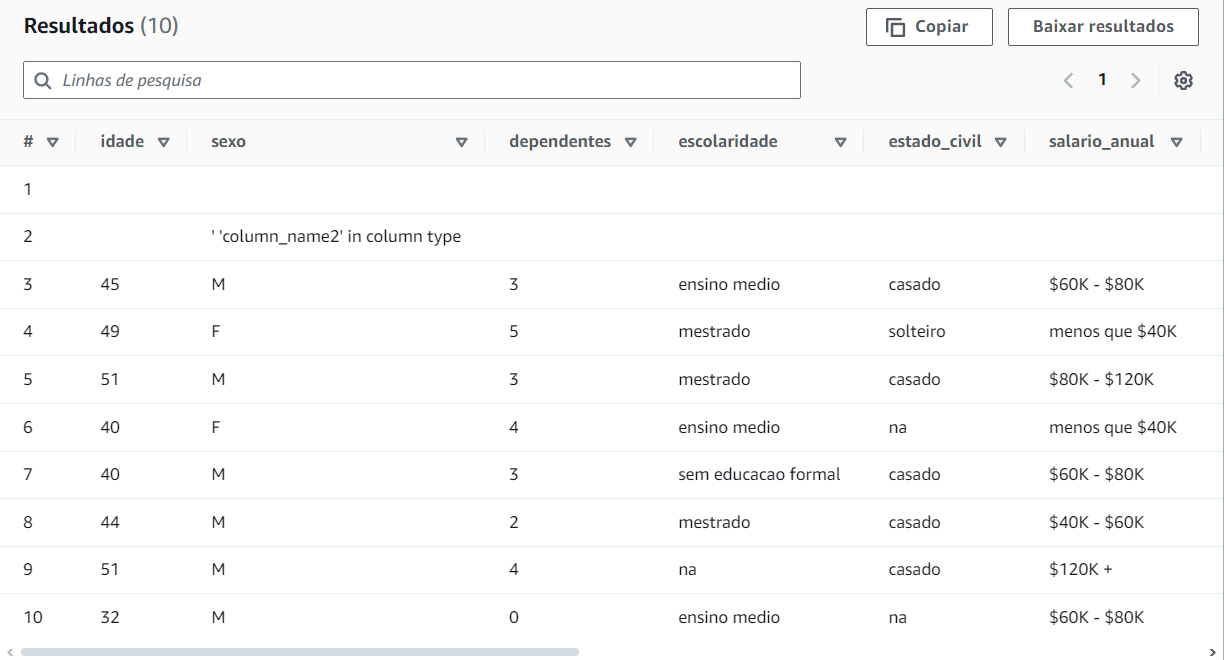

Foi possível constatar que dispomos de valores vazios (na), necessitamos examinar mais detalhadamente os valores de cada coluna.

In [ ]:
DESCRIBE credito

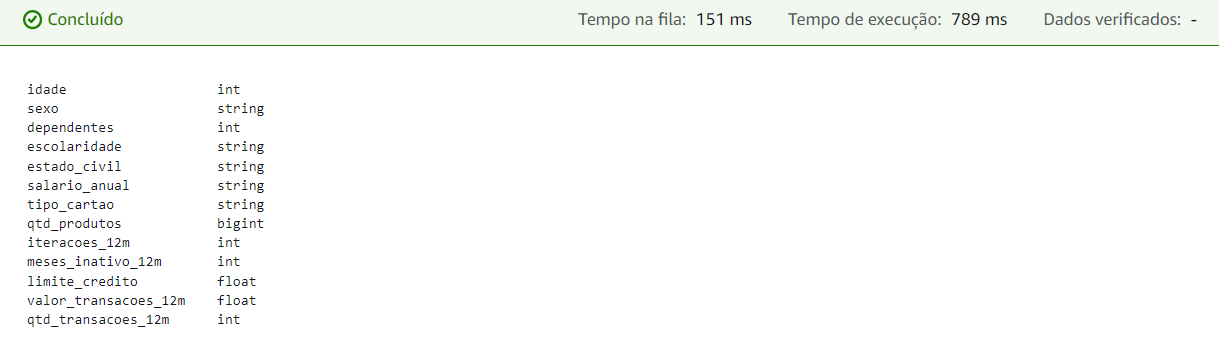

Atualmente, podemos identificar que tipo de informação cada coluna contém, agora vamos averiguar os dados que não são numéricos.

In [ ]:
SELECT DISTINCT escolaridade FROM credito

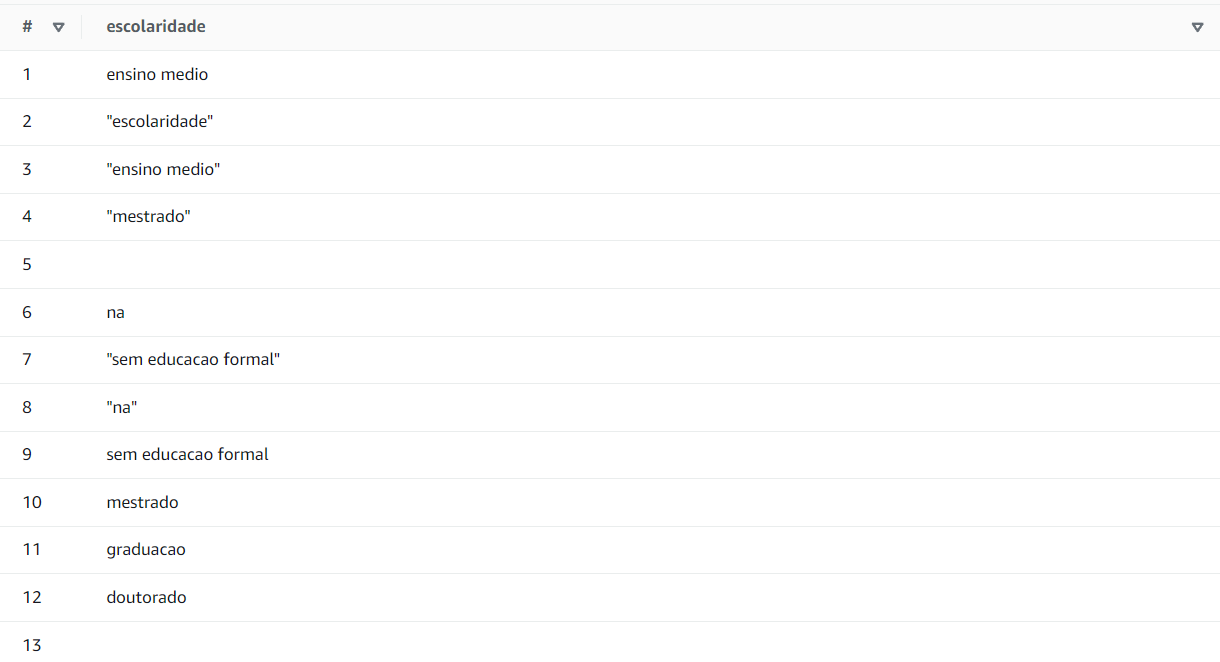

De início, já percebemos que existem valores vazios e várias categorias de instrução.

Trataremos desses dados ausentes posteriormente.

In [ ]:
SELECT COUNT(*), salario_anual, sexo FROM credito GROUP BY sexo, salario_anual;

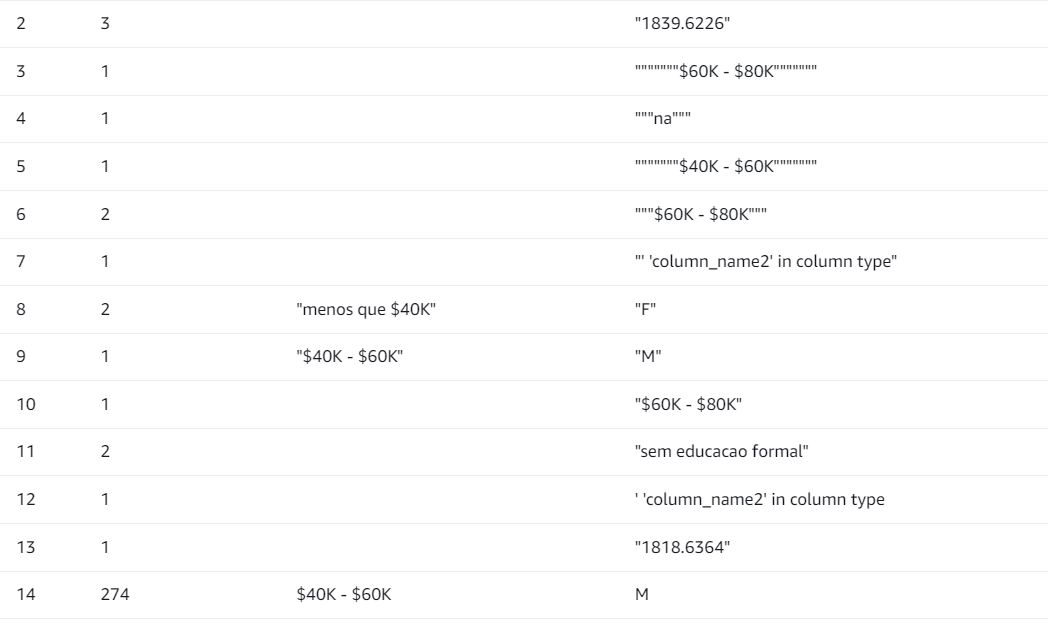

Lamentavelmente, é uma realidade: neste banco de dados, as mulheres têm salários menores que os homens, o que tem um impacto direto no limite de crédito.

In [ ]:
select count(*), sexo from credito group by sexo

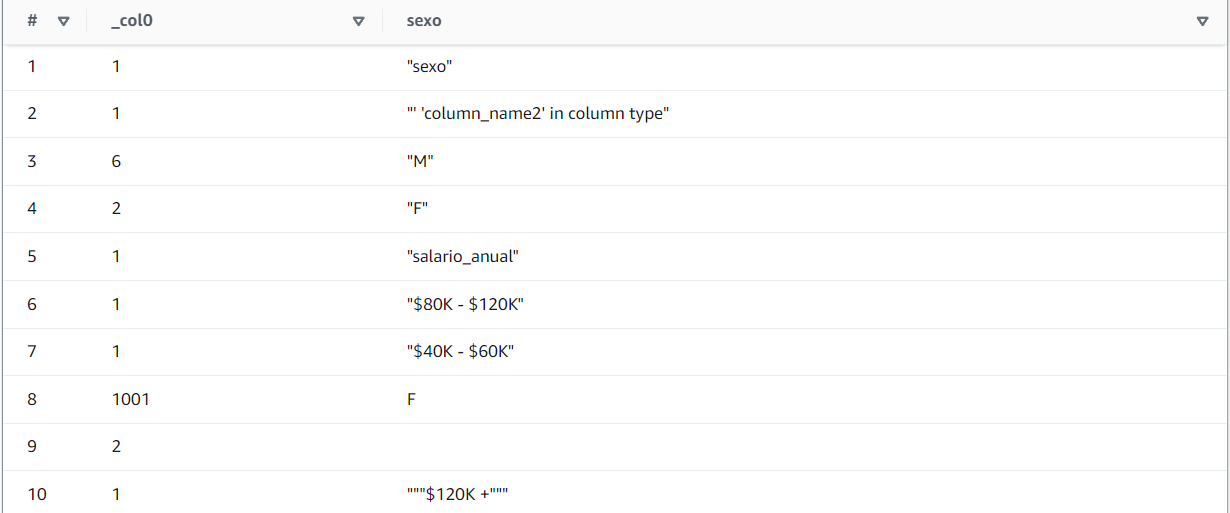

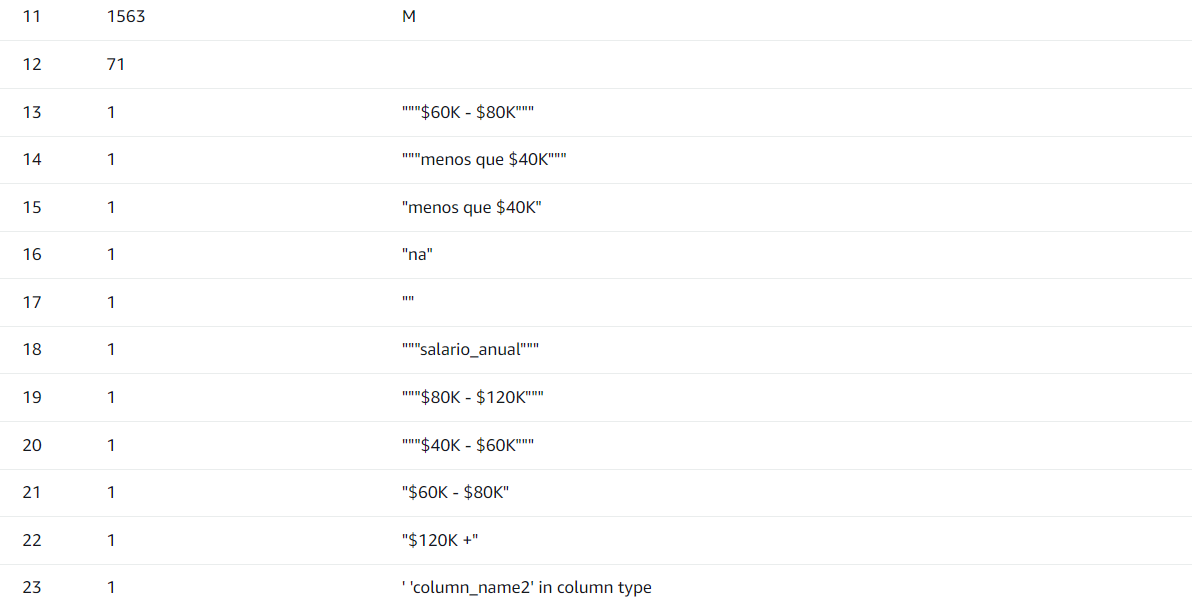

O número de clientes homens é aproximadamente 50% superior ao de mulheres.

In [ ]:
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo
order by limite_credito desc
limit 10

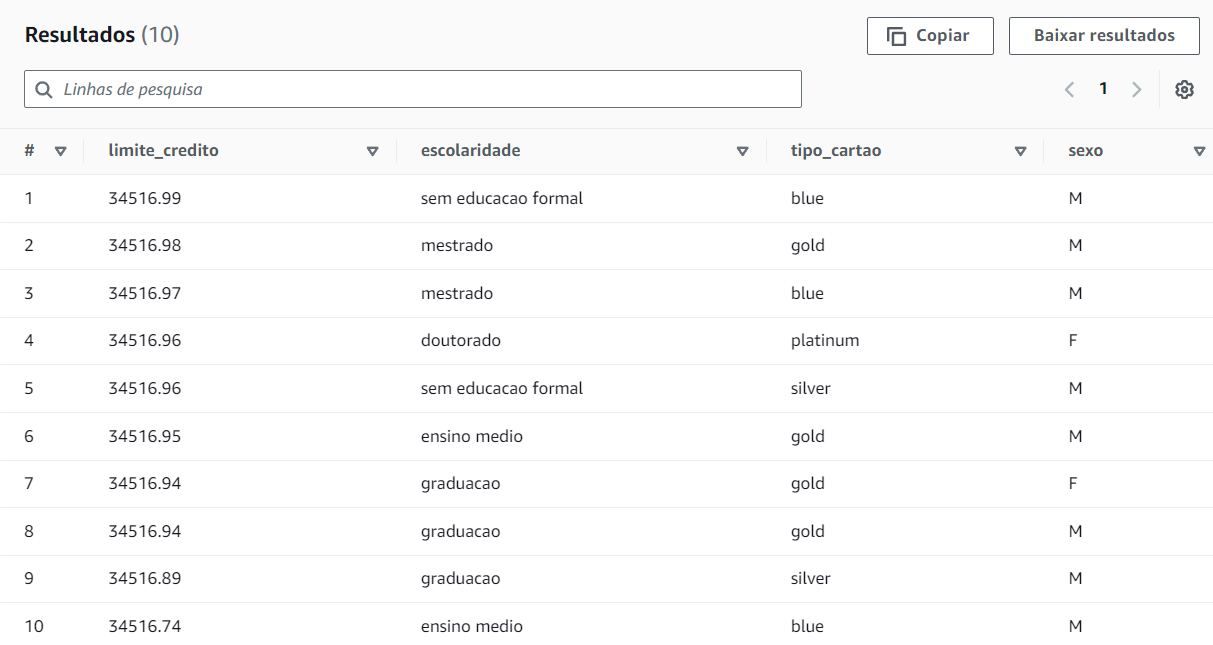

Parece que a escolaridade não exerce influência sobre o limite de crédito, já que o maior limite está associado a um cliente sem educação formal. Além disso, o tipo de cartão também não parece estar correlacionado com o limite, pois observamos que o maior limite pertence a um cartão do tipo blue.

In [ ]:
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo

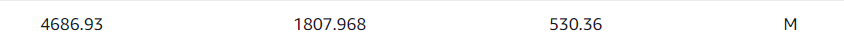

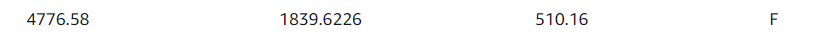

Não há diferença significativa entre os gatos de homens e mulheres.

In [ ]:
select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc

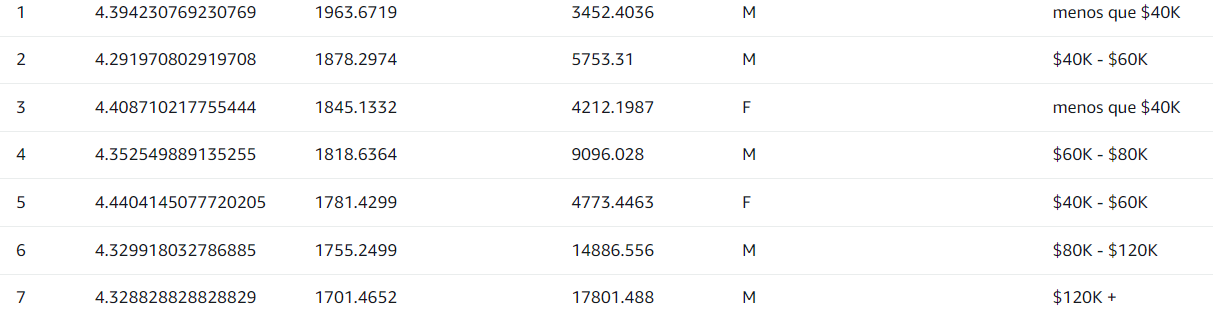

Foi possível observar que o salário exerce uma influência direta no limite de crédito.

# **2. Considerações**



A avaliação do conjunto de dados revelou percepções relevantes sobre a base de clientes e seus cartões de crédito, evidenciando diferenças significativas entre os gêneros que requerem medidas para promover igualdade e inclusão.

**Desigualdade de Renda e Limite de Crédito**: **negrito** Há uma evidente distinção salarial entre homens e mulheres, com as mulheres obtendo remunerações anuais significativamente inferiores. Essa desigualdade também se manifesta nos limites de crédito, onde os homens recebem limites mais elevados, independentemente do nível educacional.

**Distribuição de Renda:** A maior parte dos clientes, independentemente do sexo, tem uma renda anual de até 40 mil, o que pode sugerir a demanda por produtos e serviços financeiros mais ajustados a essa faixa de rendimento.

***Sugestões:***

**Elaborar Produtos para Segmentos de Renda Específicos:** Desenvolver produtos e serviços financeiros que atendam às demandas da maioria dos clientes, cuja renda anual é de até 40 mil, como cartões com benefícios relevantes para essa faixa de rendimento e iniciativas de educação financeira.

**Revisão da Política de Concessão de Limites de Crédito:** É essencial conduzir uma análise detalhada dos critérios aplicados na determinação dos limites de crédito, visando eliminar preconceitos de gênero e assegurar que as mulheres tenham acesso a limites equitativos e adequados à sua renda e perfil financeiro.

**Comunicação Clara:** Implementar uma comunicação direta e transparente sobre os critérios de aprovação de crédito e os benefícios de cada produto, assegurando que todos os clientes tenham acesso às mesmas informações e oportunidades.








**Acompanhamento Constante:** Estabelecer um sistema de acompanhamento contínuo para detectar e corrigir possíveis desigualdades de gênero relacionadas aos produtos, serviços e limites de crédito disponibilizados.

Ao adotar essas recomendações, a instituição financeira estará promovendo um sistema financeiro mais equitativo e inclusivo, proporcionando oportunidades iguais para todos os clientes, independentemente do sexo.